# Examples
### 1
Apply a production to a graph.

frozenset({Edge(type=EdgeType.E, vertices=frozenset({'A', 'D'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'C', 'D'}), parameters={}), Edge(type=EdgeType.Q, vertices=frozenset({'A', 'C', 'B', 'D'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'A', 'B'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'B', 'C'}), parameters={})})


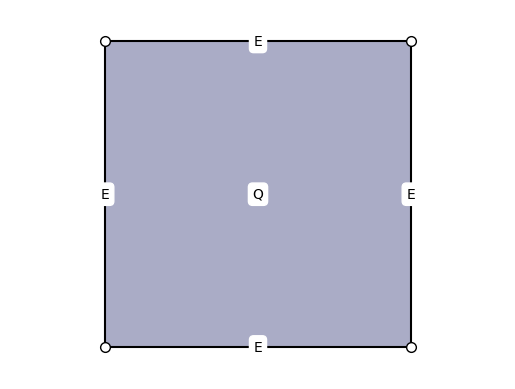

In [20]:
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType
from hypergrammar.productions.prod_0 import Prod0

hg = Hypergraph()
hg.add_edge(Edge(EdgeType.E, frozenset({"A", "B"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"B", "C"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"C", "D"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"D", "A"})))
hg.add_edge(Edge(EdgeType.Q, frozenset({"A", "B", "C", "D"}), {"R": 0}))

hg.set_vertex_parameter("A", {"x": 0, "y": 0})
hg.set_vertex_parameter("B", {"x": 1, "y": 0})
hg.set_vertex_parameter("C", {"x": 1, "y": 1})
hg.set_vertex_parameter("D", {"x": 0, "y": 1})

prod0 = Prod0()
new_hg = prod0.apply(hg)
if new_hg:
    print(new_hg.get_edges())
    new_hg.draw(use_positional_parameters=True)
else:
    print("Production could not be applied.")

### 2
Create a criterion to choose an edge to which a production should be applied.

frozenset({Edge(type=EdgeType.Q, vertices=frozenset({'E', 'C', 'F', 'D'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'A', 'B'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'F', 'D'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'C', 'B'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'A', 'D'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'E', 'F'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'C', 'D'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'E', 'C'}), parameters={}), Edge(type=EdgeType.Q, vertices=frozenset({'C', 'A', 'D', 'B'}), parameters={'R': 0})})
Production could not be applied.


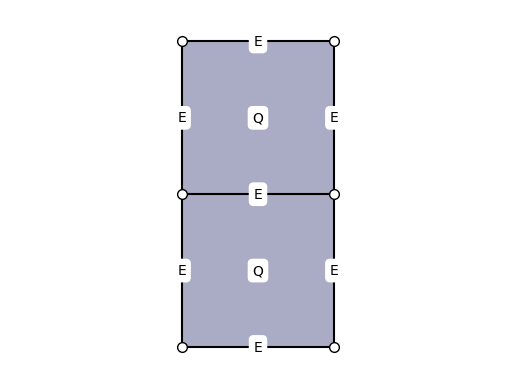

In [7]:
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType
from hypergrammar.productions.prod_0 import Prod0
from typing import Any, Mapping, Optional, List
from shapely.geometry import Point, MultiPoint

# create an rfc to stop applying the production to random edges
class BlockingRFC:
    def is_valid(self, edge: Edge, hypergraph: Hypergraph, meta: Optional[Mapping[str, Any]] = None) -> bool:
        return False

# create an rfc for a production applying only for specified edge
class EdgeRFC:

    def __init__(self, edge: Edge):
        self._edge = edge

    def is_valid(self, edge: Edge, hypergraph: Hypergraph, meta: Optional[Mapping[str, Any]] = None) -> bool:
        return self._edge == edge

hg = Hypergraph(rfc=BlockingRFC())
hg.add_edge(Edge(EdgeType.E, frozenset({"A", "B"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"B", "C"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"C", "D"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"D", "A"})))
hg.add_edge(Edge(EdgeType.Q, frozenset({"A", "B", "C", "D"}), {"R": 0}))

hg.add_edge(Edge(EdgeType.E, frozenset({"C", "E"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"D", "F"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"E", "F"})))
hg.add_edge(Edge(EdgeType.Q, frozenset({"C", "D", "E", "F"}), {"R": 0}))

hg.set_vertex_parameter("A", {"x": 0, "y": 0})
hg.set_vertex_parameter("B", {"x": 1, "y": 0})
hg.set_vertex_parameter("C", {"x": 1, "y": 1})
hg.set_vertex_parameter("D", {"x": 0, "y": 1})
hg.set_vertex_parameter("E", {"x": 1, "y": 2})
hg.set_vertex_parameter("F", {"x": 0, "y": 2})

# apply rfc to specified edge
prod0 = Prod0(rfc=EdgeRFC(Edge(EdgeType.Q, frozenset({"C", "D", "E", "F"}), {"R": 0})))
new_hg = prod0.apply(hg)
if new_hg:
    print(new_hg.get_edges())
    new_hg.draw(use_positional_parameters=True)
else:
    print("Production could not be applied.")

# try applying the production again
new_hg = prod0.apply(new_hg)
if new_hg:
    print(new_hg.get_edges())
    new_hg.draw(use_positional_parameters=True)
else:
    print("Production could not be applied.")

# the second production will not be applied because of the BlockingRFC

### 3
Creating a criterion using parameters to decide which edge the production should be applied to.
The criterion is that if a point is inside a polygon defined by the hyperedge Q than that edge is refined.

frozenset({Edge(type=EdgeType.Q, vertices=frozenset({'E', 'C', 'F', 'D'}), parameters={'R': 1}), Edge(type=EdgeType.E, vertices=frozenset({'A', 'B'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'F', 'D'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'C', 'B'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'A', 'D'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'E', 'F'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'C', 'D'}), parameters={}), Edge(type=EdgeType.E, vertices=frozenset({'E', 'C'}), parameters={}), Edge(type=EdgeType.Q, vertices=frozenset({'C', 'A', 'D', 'B'}), parameters={'R': 0})})
Production could not be applied.


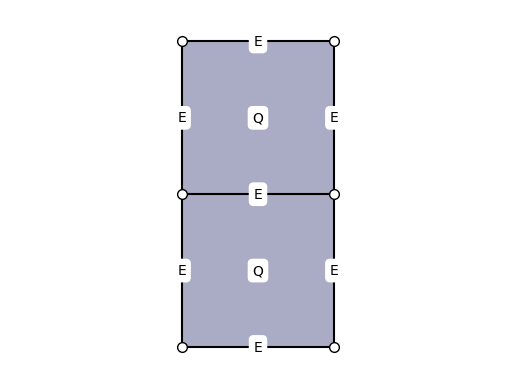

In [6]:
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType
from hypergrammar.productions.prod_0 import Prod0
from typing import Any, Mapping, Optional, List
from shapely.geometry import Point, MultiPoint

class CustomRFC:

    def __init__(self, points: List[Point]):
        self._points = points

    def is_valid(self, edge: Edge, hypergraph: Hypergraph, meta: Optional[Mapping[str, Any]] = None) -> bool:

        if not self._points:
            return False

        params = map(lambda v: hypergraph.get_vertex_parameters(v), edge.get_vertices())
        polygon_points = list(map(lambda p: Point(p['x'], p['y']), params))

        polygon = MultiPoint(polygon_points).convex_hull
        res  = polygon.contains(self._points[-1])

        if res:
            self._points.pop()
            return True

        return False

hg = Hypergraph(rfc=CustomRFC([Point(0.5, 1.5), Point(0.5, 1.5)]))
hg.add_edge(Edge(EdgeType.E, frozenset({"A", "B"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"B", "C"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"C", "D"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"D", "A"})))
hg.add_edge(Edge(EdgeType.Q, frozenset({"A", "B", "C", "D"}), {"R": 0}))

hg.add_edge(Edge(EdgeType.E, frozenset({"C", "E"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"D", "F"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"E", "F"})))
hg.add_edge(Edge(EdgeType.Q, frozenset({"C", "D", "E", "F"}), {"R": 0}))

hg.set_vertex_parameter("A", {"x": 0, "y": 0})
hg.set_vertex_parameter("B", {"x": 1, "y": 0})
hg.set_vertex_parameter("C", {"x": 1, "y": 1})
hg.set_vertex_parameter("D", {"x": 0, "y": 1})
hg.set_vertex_parameter("E", {"x": 1, "y": 2})
hg.set_vertex_parameter("F", {"x": 0, "y": 2})

# apply prod0 anch check if the proper edge was refined
prod0 = Prod0()
hg = prod0.apply(hg)
if hg:
    print(hg.get_edges())
    hg.draw(use_positional_parameters=True)
else:
    print("Production could not be applied.")

# check whether the production is not applied again
prod0 = Prod0()
hg = prod0.apply(hg)
if hg:
    print(hg.get_edges())
    hg.draw(use_positional_parameters=True)
else:
    print("Production could not be applied.")

Execution: Running test logic for 'test_apply_valid_p7'...


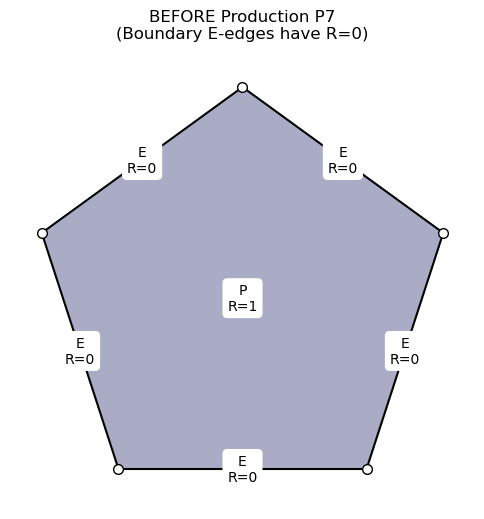

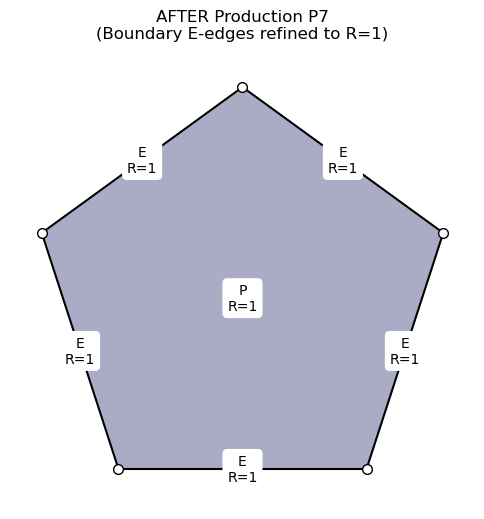

Assertion Check: All boundary edges converted to R=1? Yes
Assertion Check: Parameter B=10 preserved on edge v1-v2? Yes


In [4]:
import math
import matplotlib.pyplot as plt
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType
from hypergrammar.productions.prod_7 import Prod7

# ---------------------------------------------------------
# 1. Setup & Visualization Helpers
# ---------------------------------------------------------

# Ensure EdgeType.P exists
if not hasattr(EdgeType, 'P'):
    try:
        import aenum
        aenum.extend_enum(EdgeType, 'P', 99)
    except ImportError:
        pass # Assuming it might be defined elsewhere or mocking isn't needed

# Monkeypatch Edge.__str__ so plots show the 'R' parameters
# This makes the difference between "Before" and "After" visible
def edge_str_with_params(self):
    # Only show relevant params to keep plot clean
    r_val = self.parameters.get("R")
    if r_val is not None:
        return f"{self.edge_type.name}\nR={r_val}"
    return self.edge_type.name

Edge.__str__ = edge_str_with_params

# 2. Recreating 'test_apply_valid_p7' with Geometry

hg = Hypergraph()
verts = ["v1", "v2", "v3", "v4", "v5"]

# A. Calculate coordinates so it looks like a Pentagon
# (Unit tests don't need this, but plots do!)
center = (2.5, 2.5)
radius = 2.0
for i, v in enumerate(verts):
    # Start at 90 degrees (top) and rotate 72 degrees for each vertex
    angle_rad = math.radians(90 + i * 72)
    x = center[0] + radius * math.cos(angle_rad)
    y = center[1] + radius * math.sin(angle_rad)
    hg.set_vertex_parameter(v, {"x": x, "y": y})

# B. Create boundary E edges (Pentagon cycle)
# We match the test case: R=0, various B values
edges_setup = [
    (("v1", "v2"), 10),
    (("v2", "v3"), 20),
    (("v3", "v4"), 30),
    (("v4", "v5"), 40),
    (("v5", "v1"), 50),
]

for pair, b_val in edges_setup:
    # R=0 here means "Not yet marked for refinement"
    hg.add_edge(Edge(EdgeType.E, frozenset(pair), {"R": 0, "B": b_val}))

# C. Create the central P edge
# R=1 is the condition that triggers Production 7
hg.add_edge(Edge(EdgeType.P, frozenset(verts), {"R": 1}))

print("Execution: Running test logic for 'test_apply_valid_p7'...")

plt.figure(figsize=(6, 6))
plt.title("BEFORE Production P7\n(Boundary E-edges have R=0)")
hg.draw(use_positional_parameters=True)
plt.show()

prod7 = Prod7()
result_hg = prod7.apply(hg)

if result_hg:
    plt.figure(figsize=(6, 6))
    plt.title("AFTER Production P7\n(Boundary E-edges refined to R=1)")
    result_hg.draw(use_positional_parameters=True)
    plt.show()
    
    # --- assertions from your test case ---
    edges = result_hg.get_edges()
    e_edges = [e for e in edges if e.get_type() == EdgeType.E]
    
    # Verify R=1
    all_r1 = all(e.get_parameters()["R"] == 1 for e in e_edges)
    print(f"Assertion Check: All boundary edges converted to R=1? {'Yes' if all_r1 else '❌ No'}")
    
    # Verify B preserved (checking v1-v2 specifically)
    e_v1_v2 = next(e for e in e_edges if e.get_vertices() == frozenset({"v1", "v2"}))
    b_preserved = e_v1_v2.get_parameters()["B"] == 10
    print(f"Assertion Check: Parameter B=10 preserved on edge v1-v2? {'Yes' if b_preserved else '❌ No'}")

else:
    print("Production failed to apply (Logic Error)")